In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from seaborn import color_palette
#sns.set_context("talk", font_scale=1.4)
#sns.set_style("whitegrid")

In [3]:
e906 = pd.read_csv('e906.dat')
e906.head()

,low_x2,high_x2,x2,dbar_ubar,low_stat,high_stat,sys
0,0.100,0.130,0.1200,1.509,0.12740,0.12490,0.07971
1,0.130,0.160,0.1459,1.613,0.08934,0.08775,0.07459
2,0.160,0.195,0.1766,1.648,0.08408,0.08316,0.07531
3,0.195,0.240,0.2149,1.570,0.09108,0.09074,0.07301
4,0.240,0.290,0.2623,1.789,0.13720,0.13700,0.09789


In [4]:
na51 = pd.DataFrame([[0.145,0.212,0.18,1.961,0.2462,0.2462,0.0]], columns=e906.columns)
na51

,low_x2,high_x2,x2,dbar_ubar,low_stat,high_stat,sys
0,0.145,0.212,0.18,1.961,0.2462,0.2462,0.0


In [5]:
e866 = pd.read_csv('e866.dat')
e866.head()

,low_x2,high_x2,x2,dbar_ubar,low_stat,high_stat,sys
0,0.015,0.030,0.026,1.085,0.050,0.050,0.017
1,0.030,0.045,0.038,1.140,0.027,0.027,0.018
2,0.045,0.060,0.052,1.215,0.026,0.026,0.020
3,0.060,0.075,0.067,1.249,0.028,0.028,0.021
4,0.075,0.090,0.082,1.355,0.036,0.036,0.023


In [6]:
bs15 = pd.read_csv('BS15nlo.dat')
bs15['hi_dbar_ubar'] = bs15.apply(lambda x: max(x.dbar1/x.ubar1, x.dbar2/x.ubar2), axis=1)
bs15['low_dbar_ubar'] = bs15.apply(lambda x: min(x.dbar1/x.ubar1, x.dbar2/x.ubar2), axis=1)
bs15 = bs15.query('x<0.6025')
bs15.head()

,x,dbar1,ubar1,dbar2,ubar2,hi_dbar_ubar,low_dbar_ubar
0,0.010000,0.120693,0.115921,0.360899,0.351552,1.041166,1.026588
1,0.011000,0.121378,0.116031,0.348757,0.338659,1.046083,1.029818
2,0.012100,0.122087,0.116101,0.336930,0.326030,1.051559,1.033433
3,0.013310,0.122819,0.116125,0.325407,0.313650,1.057645,1.037484
4,0.014641,0.123573,0.116098,0.314178,0.301511,1.064385,1.042012


In [7]:
ct14 = pd.read_csv('CT14nlo.dat')
ct14['hi_dbar_ubar'] = ct14.apply(lambda x: max(x.dbar1/x.ubar1, x.dbar2/x.ubar2), axis=1)
ct14['low_dbar_ubar'] = ct14.apply(lambda x: min(x.dbar1/x.ubar1, x.dbar2/x.ubar2), axis=1)
ct14 = ct14.query('x<0.6025')
ct14.head()

,x,q1,dbar1,ubar1,q2,dbar2,ubar2,hi_dbar_ubar,low_dbar_ubar
0,0.001,1,179.8830,253.2770,100,1440.560,1499.920,0.960425,0.710222
1,0.002,1,79.8889,107.7050,100,546.379,563.435,0.969729,0.741738
2,0.003,1,51.7451,65.5139,100,309.151,315.261,0.980619,0.789834
3,0.004,1,38.6869,46.2016,100,206.029,207.956,0.990734,0.837350
4,0.005,1,31.1090,35.3542,100,150.158,150.199,0.999727,0.879924


In [8]:
mmht14 = pd.read_csv('MMHT14nlo.dat')
mmht14['hi_dbar_ubar'] = mmht14.apply(lambda x: max(x.dbar1/x.ubar1, x.dbar2/x.ubar2), axis=1)
mmht14['low_dbar_ubar'] = mmht14.apply(lambda x: min(x.dbar1/x.ubar1, x.dbar2/x.ubar2), axis=1)
mmht14 = mmht14.query('x<0.6025')
mmht14.head()

,x,q1,dbar1,ubar1,q2,dbar2,ubar2,hi_dbar_ubar,low_dbar_ubar
0,0.001,1,270.9540,270.9040,100,1476.400,1473.890,1.001703,1.000185
1,0.002,1,111.0360,110.9540,100,554.933,552.895,1.003686,1.000739
2,0.003,1,65.7397,65.6274,100,311.249,309.412,1.005937,1.001711
3,0.004,1,45.3947,45.2580,100,205.510,203.815,1.008316,1.003020
4,0.005,1,34.2445,34.0861,100,148.728,147.134,1.010834,1.004647


In [9]:
#current_palette = color_palette('colorblind')
#colors = current_palette[:3]
colors = [(0.0, 0.4470588235294118, 0.6980392156862745),
          (0.0, 0.6196078431372549, 0.45098039215686275),
          (0.8352941176470589, 0.3686274509803922, 0.0)]

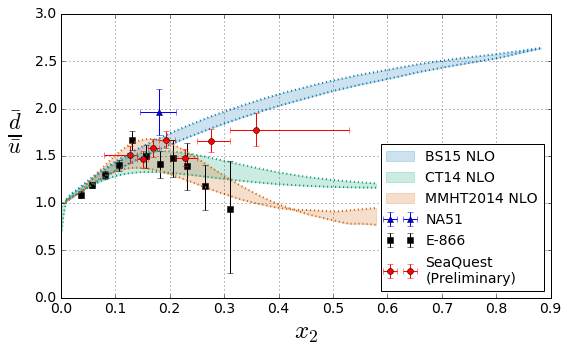

In [10]:
fig, ax = plt.subplots(1, figsize=(8, 5))

# Data
ax.errorbar(na51.x2, na51.dbar_ubar, xerr=[na51.x2-na51.low_x2, na51.high_x2-na51.x2],
            yerr=[na51.low_stat, na51.high_stat], fmt='b^', label='NA51')
ax.errorbar(e866.x2, e866.dbar_ubar, xerr=[e866.x2-e866.low_x2, e866.high_x2-e866.x2],
            yerr=[e866.low_stat, e866.high_stat], fmt='ks', label='E-866')
ax.errorbar(e906.x2, e906.dbar_ubar, xerr=[e906.x2-e906.low_x2, e906.high_x2-e906.x2],
            yerr=[e906.low_stat, e906.high_stat], fmt='ro', label='SeaQuest\n(Preliminary)')
# BS15
ax.plot(bs15.x, bs15.dbar1/bs15.ubar1, ls=':', lw=2, color=colors[0])
ax.plot(bs15.x, bs15.dbar2/bs15.ubar2, ls=':', lw=2, color=colors[0])
ax.fill_between(bs15.x, bs15.hi_dbar_ubar, bs15.low_dbar_ubar,
                alpha=0.2, label='BS15 NLO', color=colors[0])
# CT14
ax.plot(ct14.x, ct14.dbar1/ct14.ubar1, ls=':', lw=2, color=colors[1])
ax.plot(ct14.x, ct14.dbar2/ct14.ubar2, ls=':', lw=2, color=colors[1])
ax.fill_between(ct14.x, ct14.hi_dbar_ubar, ct14.low_dbar_ubar,
                alpha=0.2, label='CT14 NLO', color=colors[1])
# MMHT2014
ax.plot(mmht14.x, mmht14.dbar1/mmht14.ubar1, ls=':', lw=2, color=colors[2])
ax.plot(mmht14.x, mmht14.dbar2/mmht14.ubar2, ls=':', lw=2, color=colors[2])
ax.fill_between(mmht14.x, mmht14.hi_dbar_ubar, mmht14.low_dbar_ubar,
                alpha=0.2, label='MMHT2014 NLO', color=colors[2])

# Labels
ax.set_ylabel(r'$\frac{\bar{d}}{\bar{u}}$', rotation=0, fontsize=32)
ax.set_xlabel(r'$x_2$', fontsize=25)
ax.yaxis.labelpad = 20

# Aesthetics
ax.grid()
ax.legend(loc='lower right', fontsize=14, frameon=True)
plt.setp(ax.get_yticklabels(), fontsize=14)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.tight_layout()

# Output
plt.savefig('dbar_ubar.ps')
plt.savefig('dbar_ubar.png')

In [10]:
e866_sys = []
e866_edges = []
e866_sys_base = 0.5
for i in range(0,len(e866.sys.values)):
    e866_edges.append(e866.low_x2[i])
    e866_edges.append(e866.high_x2[i])
    e866_sys.append(e866_sys_base+e866.sys[i])
    e866_sys.append(e866_sys_base+e866.sys[i])
    
e906_sys = []
e906_edges = []
e906_sys_base = 0.13
for i in range(0,len(e906.sys)):
    e906_edges.append(e906.low_x2[i])
    e906_edges.append(e906.high_x2[i])
    e906_sys.append(e906_sys_base+e906.sys[i])
    e906_sys.append(e906_sys_base+e906.sys[i])

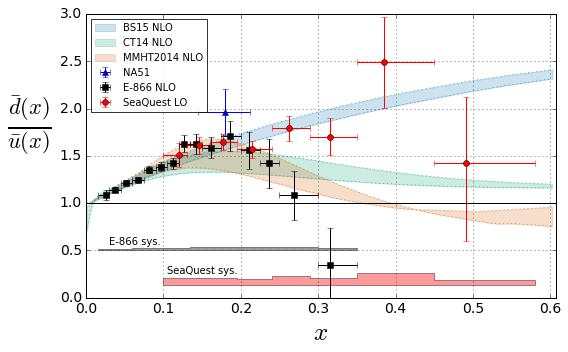

In [11]:
fig, ax = plt.subplots(1, figsize=(8, 5))

# BS15
ax.plot(bs15.x, bs15.dbar1/bs15.ubar1, ls=':', lw=0.5, color=colors[0])
ax.plot(bs15.x, bs15.dbar2/bs15.ubar2, ls=':', lw=0.5, color=colors[0])
ax.fill_between(bs15.x, bs15.hi_dbar_ubar, bs15.low_dbar_ubar,
                alpha=0.2, label='BS15 NLO', color=colors[0])
# CT14
ax.plot(ct14.x, ct14.dbar1/ct14.ubar1, ls=':', lw=0.5, color=colors[1])
ax.plot(ct14.x, ct14.dbar2/ct14.ubar2, ls=':', lw=0.5, color=colors[1])
ax.fill_between(ct14.x, ct14.hi_dbar_ubar, ct14.low_dbar_ubar,
                alpha=0.2, label='CT14 NLO', color=colors[1])
# MMHT2014
ax.plot(mmht14.x, mmht14.dbar1/mmht14.ubar1, ls=':', lw=0.5, color=colors[2])
ax.plot(mmht14.x, mmht14.dbar2/mmht14.ubar2, ls=':', lw=0.5, color=colors[2])
ax.fill_between(mmht14.x, mmht14.hi_dbar_ubar, mmht14.low_dbar_ubar,
                alpha=0.2, label='MMHT2014 NLO', color=colors[2])

# Data
ax.errorbar(na51.x2, na51.dbar_ubar,
            xerr=[na51.x2-na51.low_x2, na51.high_x2-na51.x2],
            yerr=[na51.low_stat, na51.high_stat], fmt='b^', label='NA51')
ax.errorbar(e866.x2, e866.dbar_ubar, xerr=[e866.x2-e866.low_x2, e866.high_x2-e866.x2],
            yerr=[e866.low_stat, e866.high_stat], fmt='ks', label='E-866 NLO')
ax.errorbar(e906.x2, e906.dbar_ubar,
            xerr=[e906.x2-e906.low_x2, e906.high_x2-e906.x2],
            yerr=[e906.low_stat, e906.high_stat],
            fmt='ro', label='SeaQuest LO')

ax.fill_between(e866_edges, e866_sys, e866_sys_base, facecolor='k', alpha=0.4)
ax.fill_between(e906_edges, e906_sys, e906_sys_base, facecolor='red', alpha=0.4)

ax.text(0.03, 0.56, 'E-866 sys.')
ax.text(0.105, 0.25, 'SeaQuest sys.')


# Axis Labels
ax.set_ylabel(r'$\frac{\bar{d}(x)}{\bar{u}(x)}$', rotation=0, fontsize=32)
ax.set_xlabel(r'$x$', fontsize=25)
ax.yaxis.labelpad = 30 # Add space between y-axis label and y-axis

# Aesthetics
ax.grid()
ax.set_xlim([0,0.607])
ax.set_ylim([0,3.0])
plt.axhline(y=1.0, xmin=0.0, xmax=1.0, linewidth=1, color = 'k') # Line at 1
ax.legend(loc='upper left', fontsize=10, frameon=True, framealpha=0.8, numpoints=1)
plt.setp(ax.get_yticklabels(), fontsize=14)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.tight_layout()

# Output
plt.savefig('dbar_ubar.eps', dpi=900)
plt.savefig('dbar_ubar.png', dpi=2000)

In [15]:
e866['log_dbar_ubar'] = np.log(e866.dbar_ubar)
e866['log_low_stat'] = np.divide(e866.low_stat,e866.dbar_ubar)
e866['log_high_stat'] = np.divide(e866.high_stat,e866.dbar_ubar)
e866['log_sys'] = np.divide(e866.sys,e866.dbar_ubar)

e906['log_dbar_ubar'] = np.log(e906.dbar_ubar)
e906['log_low_stat'] = np.divide(e906.low_stat,e906.dbar_ubar)
e906['log_high_stat'] = np.divide(e906.high_stat,e906.dbar_ubar)
e906['log_sys'] = np.divide(e906.sys,e906.dbar_ubar)

na51['log_dbar_ubar'] = np.log(na51.dbar_ubar)
na51['log_low_stat'] = np.divide(na51.low_stat,na51.dbar_ubar)
na51['log_high_stat'] = np.divide(na51.high_stat,na51.dbar_ubar)

In [31]:
e866_log_sys = []
e866_log_sys_base = -0.2
for i in range(0,len(e866.log_sys.values)):
    e866_log_sys.append(e866_log_sys_base+e866.log_sys[i])
    e866_log_sys.append(e866_log_sys_base+e866.log_sys[i])
    
e906_log_sys = []
e906_log_sys_base = -0.4
for i in range(0,len(e906.log_sys)):
    e906_log_sys.append(e906_log_sys_base+e906.log_sys[i])
    e906_log_sys.append(e906_log_sys_base+e906.log_sys[i])

In [17]:
ct14['log_hi_dbar_ubar'] = np.log(ct14.hi_dbar_ubar)
ct14['log_low_dbar_ubar'] = np.log(ct14.low_dbar_ubar)
bs15['log_hi_dbar_ubar'] = np.log(bs15.hi_dbar_ubar)
bs15['log_low_dbar_ubar'] = np.log(bs15.low_dbar_ubar)
mmht14['log_hi_dbar_ubar'] = np.log(mmht14.hi_dbar_ubar)
mmht14['log_low_dbar_ubar'] = np.log(mmht14.low_dbar_ubar)

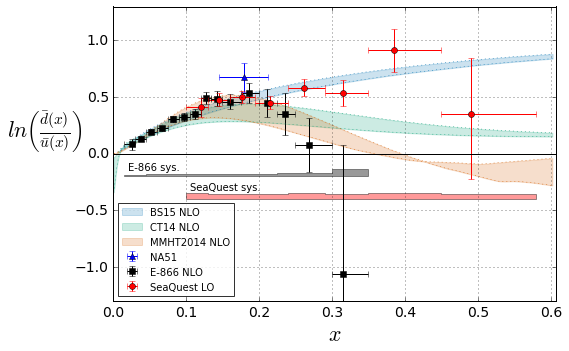

In [37]:
fig, ax = plt.subplots(1, figsize=(8, 5))

# BS15
ax.plot(bs15.x, bs15.log_hi_dbar_ubar, ls=':', lw=0.5, color=colors[0], label='_nolegend_')
ax.plot(bs15.x, bs15.log_low_dbar_ubar, ls=':', lw=0.5, color=colors[0], label='_nolegend_')
ax.fill_between(bs15.x, bs15.log_hi_dbar_ubar, bs15.log_low_dbar_ubar,
                alpha=0.2, label='BS15 NLO', color=colors[0])
# CT14
ax.plot(ct14.x, ct14.log_hi_dbar_ubar, ls=':', lw=0.5, color=colors[1], label='_nolegend_')
ax.plot(ct14.x, ct14.log_low_dbar_ubar, ls=':', lw=0.5, color=colors[1], label='_nolegend_')
ax.fill_between(ct14.x, ct14.log_hi_dbar_ubar, ct14.log_low_dbar_ubar,
                alpha=0.2, label='CT14 NLO', color=colors[1])
# MMHT2014
ax.plot(mmht14.x, mmht14.log_hi_dbar_ubar, ls=':', lw=0.5, color=colors[2], label='_nolegend_')
ax.plot(mmht14.x, mmht14.log_low_dbar_ubar, ls=':', lw=0.5, color=colors[2], label='_nolegend_')
ax.fill_between(mmht14.x, mmht14.log_hi_dbar_ubar, mmht14.log_low_dbar_ubar,
                alpha=0.2, label='MMHT2014 NLO', color=colors[2])

# Data
ax.errorbar(na51.x2, na51.log_dbar_ubar,
            xerr=[na51.x2-na51.low_x2, na51.high_x2-na51.x2],
            yerr=[na51.log_low_stat, na51.log_high_stat], fmt='b^', label='NA51')
ax.errorbar(e866.x2, e866.log_dbar_ubar, xerr=[e866.x2-e866.low_x2, e866.high_x2-e866.x2],
            yerr=[e866.log_low_stat, e866.log_high_stat], fmt='ks', label='E-866 NLO')
ax.errorbar(e906.x2, e906.log_dbar_ubar,
            xerr=[e906.x2-e906.low_x2, e906.high_x2-e906.x2],
            yerr=[e906.log_low_stat, e906.log_high_stat],
            fmt='ro', label='SeaQuest LO')

ax.fill_between(e866_edges, e866_log_sys, e866_log_sys_base, facecolor='k', alpha=0.4)
ax.fill_between(e906_edges, e906_log_sys, e906_log_sys_base, facecolor='red', alpha=0.4)

ax.text(0.02, -0.15, 'E-866 sys.')
ax.text(0.105, -0.32, 'SeaQuest sys.')


# Axis Labels
ax.set_ylabel(r'$ln\left(\frac{\bar{d}(x)}{\bar{u}(x)}\right)$', rotation=0, fontsize=22)
ax.set_xlabel(r'$x$', fontsize=22)
ax.yaxis.labelpad = 30 # Add space between y-axis label and y-axis

# Aesthetics
ax.grid()
ax.set_xlim([0,0.607])
ax.set_ylim([-1.3,1.3])
plt.axhline(y=0.0, xmin=0.0, xmax=1.0, linewidth=1, color = 'k') # Line at 1
ax.legend(loc='lower left', fontsize=10, frameon=True, framealpha=0.8, numpoints=1)
plt.setp(ax.get_yticklabels(), fontsize=14)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.tight_layout()

# Output
#plt.savefig('dbar_ubar_log.eps', dpi=900)
plt.savefig('dbar_ubar_log.png', dpi=2000)